In [4]:
from molsim import MolecularDynamics
import matplotlib.pyplot as plt
import numpy as np

plt.rc("font", **{"size": 16})
plt.rc("axes", **{"formatter.use_mathtext": True, "labelpad": 8})

In [ ]:
Another challenge LAMMPS faces, which we assume is common to other long-lived, open-source materials and biomolecular mod- eling codes, MD or otherwise, is how to deal with longevity in a software sense. Core developers move to new jobs or grow old and retire. People who have contributed code may move to other insti- tutions or leave the field or simply disappear (in an email sense). Complex code, whether it be low-level kernels or entire features like the style files or packages described in Section 4.2, may only be well enough understood by the original authors to easily debug, enhance with new capabilities, or adapt when the rest of LAMMPS changes. Facing these realities, how can a large code, which may have hundreds of contributors, be efficiently maintained over the timescale of decades?

In [5]:
md = MolecularDynamics(
    numberOfParticles=200,
    temperature=1.0,
    dt=0.005,
    boxSize=8.0,
    numberOfEquilibrationSteps=int(1e4),
    numberOfProductionSteps=int(1e5),
    outputPDB=True,
    logLevel=0,
    seed=12,
    sampleFrequency=100,
    useNoseHoover=True,
)
md.run()

[INFO]:  Class MD created.
[DEBUG]:  Molecular Dynamics program
----------------------------
Number of particles  : 200
Temperature          : 1.000000
delta t              : 0.005000
Box length           : 8.000000
Density              : 0.390625
CutOff radius        : 3.000000
CutOff energy        : -0.005479
Steps run            : 227
Observed temperature : -875011497181281115651662153796967270935233537331984508674345807981378134273665151514726739972078960640.000000
Pressure             : 0.000000
Potential energy     : 0.000000
Kinetic energy       : -197041331825005059538161074888836597932713456222585412581243259333751298627396741666718662695629750412305367400710144.000000
Conserved energy     : 0.000000
Thermostat energy    : 0.011451


[DEBUG]:  (Init) initialized momenta.
[DEBUG]:  (Init) Zeroed momentum.
[INFO]:  numGrids 7 gridSize 0.888889
[DEBUG]:  (Init) initial energy: 3196.012650
[DEBUG]:  (Init) accepted gradient descent at step 0 energy difference = -1633.481022
[DEBUG

Text(0, 0.5, 'Energy')

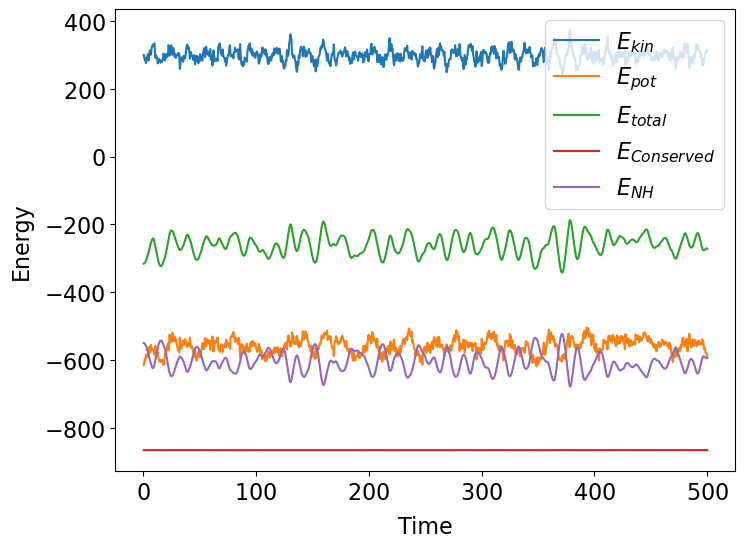

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
kin = np.array(md.kineticEnergies)
pot = np.array(md.potentialEnergies)
cons = np.array(md.conservedEnergies)

ax.plot(md.time, kin, label=r"$E_{kin}$")
ax.plot(md.time, pot, label=r"$E_{pot}$")
ax.plot(md.time, kin + pot, label=r"$E_{total}$")
ax.plot(md.time, cons, label=r"$E_{Conserved}$")
ax.plot(md.time, cons - kin - pot, label=r"$E_{NH}$")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Energy")